In [1]:
#STUDENT NAME: SHRUTHI
#STUDENT ID: 801218392
#HOMEWORK 1 QUESTION 3

In [2]:
## Please note that for this question I used AutoGrad and SGD Optimizer

%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
import pandas as pd 
torch.set_printoptions(edgeitems=2, linewidth=75)

In [3]:
# Obtaining the housing data as given in the sample code
housing = pd.DataFrame(pd.read_csv("C:/Users/Shruthi/Documents/HWs/RTML/hw1/images/Housing.csv")) 
#housing.head() 
housing
housing.shape 

(545, 13)

In [4]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
Newtrain = housing[num_vars] 
Newtrain

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000
...,...,...,...,...,...,...
540,3000,2,1,1,2,1820000
541,2400,3,1,1,0,1767150
542,3620,2,1,1,0,1750000
543,2910,3,1,1,0,1750000


In [5]:
#Randomly shuffling the rows, to give the model a more random data
t_an = Newtrain.to_numpy()
np.random.shuffle(t_an)

In [6]:
t_a1, t_a2, t_a3, t_a4, t_a5, t_cn = t_an.T
t_cn=torch.tensor(t_cn)
t_c=t_cn/1000000

In [7]:
t_t = (t_a1, t_a2, t_a3, t_a4, t_a5)
t_ua = np.vstack(t_t)
t_ua.shape
t_u = torch.tensor(t_ua)
t_un = 0.1 * t_u

In [8]:
#Defining the model as given in the question
def model(t_u, w1, w2, w3, w4, w5, b):
    W1= w1 * t_u[0, :] 
    W2= w2 * t_u[1, :]
    W3= w3 * t_u[2, :]
    W4= w4 * t_u[3, :]
    W5= w5 * t_u[4, :]
    s= W1 + W2 + W3 + W4 + W5
    un = (s+b)/100
    return un

In [9]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [10]:
#Defining the parameters as a 1x6 tensor for the values of w1, w2, w3, w4, w5 and bias respectively and 
# declaring the SGD optimizer
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [11]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()

optimizer.step()
params

tensor([ 9.4281e-01,  9.9997e-01,  9.9999e-01,  9.9998e-01,  9.9999e-01,
        -9.3612e-06], requires_grad=True)

In [12]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
#learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad() # <1>
loss.backward()
optimizer.step()

params

tensor([ 9.9991e-01,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
        -7.8113e-08], requires_grad=True)

In [13]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [14]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params, # <1> 
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 3.339180
Epoch 1000, Loss 3.338844
Epoch 1500, Loss 3.338509
Epoch 2000, Loss 3.338173
Epoch 2500, Loss 3.337837
Epoch 3000, Loss 3.337502
Epoch 3500, Loss 3.337167
Epoch 4000, Loss 3.336832
Epoch 4500, Loss 3.336496
Epoch 5000, Loss 3.336161


tensor([0.8538, 1.1358, 1.0763, 1.1192, 1.0304, 0.3580],
       requires_grad=True)

In [15]:
#Declaring the indices for the training and validation data which is randomly assigned 
n_samples = t_u.shape[1]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices  # <1>

(tensor([251, 317,   9,  49, 282,  43, 378, 439,  10, 211, 502, 463, 342,
          96, 154, 428, 131, 180, 385, 475, 134, 168, 377,  89, 293,  59,
          61, 498, 160, 274, 487, 173, 473,  90, 189, 345, 311, 132, 397,
           7, 480, 220, 231, 405, 423, 520,  47, 228, 539, 320, 275, 404,
          41, 223,  40, 306, 261,  93, 540, 140, 267, 153,  77, 324, 162,
         203, 353, 158, 448, 297,  81, 406, 235, 219, 490, 348,  94, 398,
         187, 522,  35, 259, 289, 410,  66, 195,  80, 481, 105, 217, 115,
         253, 323, 159, 412, 531, 505, 497, 126, 387, 214, 447, 122, 269,
          28,   6, 149, 233, 529, 308, 425, 367, 426,  13, 336, 243, 114,
          22, 476, 375, 143, 215, 230, 161,  19, 437, 110, 421, 364, 543,
         507, 157, 225, 183, 196, 363,  53, 213, 532, 307, 186,  85, 291,
          20, 112, 310, 366,  44, 239, 411, 155, 456, 144, 104, 101, 432,
         244, 373, 393, 209,  42, 240, 526, 523, 440, 334, 332, 449, 167,
         221, 453, 326,  38, 331,  91,

In [16]:
train_t_u = t_u[:, train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[:, val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [17]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params) # <1>
        train_loss = loss_fn(train_t_p, train_t_c)
                             
        val_t_p = model(val_t_u, *params) # <1>
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward() # <2>
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")
            
    return params

In [18]:
def calc_forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
    return loss

In [19]:
                                    #*** LEARNING RATE= 1E-1 ***

In [20]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un, # <1> 
    val_t_u = val_t_un, # <1> 
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 500, Training loss nan, Validation loss nan
Epoch 1000, Training loss nan, Validation loss nan
Epoch 1500, Training loss nan, Validation loss nan
Epoch 2000, Training loss nan, Validation loss nan
Epoch 2500, Training loss nan, Validation loss nan
Epoch 3000, Training loss nan, Validation loss nan
Epoch 3500, Training loss nan, Validation loss nan
Epoch 4000, Training loss nan, Validation loss nan
Epoch 4500, Training loss nan, Validation loss nan
Epoch 5000, Training loss nan, Validation loss nan


tensor([nan, nan, nan, nan, nan, nan], requires_grad=True)

In [21]:
                                #*** LEARNING RATE= 1E-2 ***

In [22]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un, # <1> 
    val_t_u = val_t_un, # <1> 
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 500, Training loss 3.3744, Validation loss 3.2064
Epoch 1000, Training loss 3.3741, Validation loss 3.2061
Epoch 1500, Training loss 3.3737, Validation loss 3.2058
Epoch 2000, Training loss 3.3733, Validation loss 3.2055
Epoch 2500, Training loss 3.3730, Validation loss 3.2052
Epoch 3000, Training loss 3.3726, Validation loss 3.2049
Epoch 3500, Training loss 3.3723, Validation loss 3.2046
Epoch 4000, Training loss 3.3719, Validation loss 3.2043
Epoch 4500, Training loss 3.3715, Validation loss 3.2040
Epoch 5000, Training loss 3.3712, Validation loss 3.2037


tensor([0.8465, 1.1403, 1.0798, 1.1287, 1.0310, 0.3712],
       requires_grad=True)

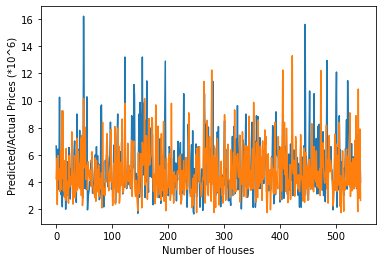

In [23]:
# In my code, i got the least training and validation loss for the learning rate 1e-2. 
#Hence, I visualized the t_p values obtained from here. The graph has the house index on the x axis and the predicted (blue)
# /actual (orange) values of the y-axis. 

import matplotlib.pyplot as plt
torch.Tensor.ndim = property(lambda self: len(self.shape))  # Fix it
#plt.ylabel("Predicted House Values")
#plt.xlabel("Actual House Values")
x = list(range(0, t_u.size(1)))
plt.xlabel("Number of Houses")
plt.ylabel("Predicted/Actual Prices (*10^6)")
plt.plot(x, t_p.detach().numpy())
plt.plot(x, t_c)
#plt.plot(t_p.detach().numpy(), t_c)  # Works now
plt.show()

In [24]:
                                         #*** LEARNING RATE= 1E-3 ***

In [25]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-3
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un, # <1> 
    val_t_u = val_t_un, # <1> 
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 500, Training loss 3.3748, Validation loss 3.2066
Epoch 1000, Training loss 3.3747, Validation loss 3.2066
Epoch 1500, Training loss 3.3747, Validation loss 3.2066
Epoch 2000, Training loss 3.3747, Validation loss 3.2065
Epoch 2500, Training loss 3.3746, Validation loss 3.2065
Epoch 3000, Training loss 3.3746, Validation loss 3.2065
Epoch 3500, Training loss 3.3745, Validation loss 3.2065
Epoch 4000, Training loss 3.3745, Validation loss 3.2064
Epoch 4500, Training loss 3.3745, Validation loss 3.2064
Epoch 5000, Training loss 3.3744, Validation loss 3.2064


tensor([0.8472, 1.0142, 1.0077, 1.0131, 1.0030, 0.0369],
       requires_grad=True)

In [26]:
                                 #*** LEARNING RATE= 1E-4 ***

In [27]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un, # <1> 
    val_t_u = val_t_un, # <1> 
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 500, Training loss 3.3761, Validation loss 3.1933
Epoch 1000, Training loss 3.3748, Validation loss 3.2061
Epoch 1500, Training loss 3.3748, Validation loss 3.2066
Epoch 2000, Training loss 3.3748, Validation loss 3.2066
Epoch 2500, Training loss 3.3748, Validation loss 3.2066
Epoch 3000, Training loss 3.3748, Validation loss 3.2066
Epoch 3500, Training loss 3.3748, Validation loss 3.2066
Epoch 4000, Training loss 3.3748, Validation loss 3.2066
Epoch 4500, Training loss 3.3748, Validation loss 3.2066
Epoch 5000, Training loss 3.3748, Validation loss 3.2066


tensor([0.8473, 1.0011, 1.0006, 1.0012, 1.0005, 0.0035],
       requires_grad=True)